In [83]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from fairlearn.metrics import MetricFrame, selection_rate, count

train_data = pd.read_pickle(open("sentence-transformers/train_emb.pkl", "rb"))
train_X = list(train_data['TFIDF'])
train_y = train_data['Sentiment']
dev_data = pd.read_pickle(open("sentence-transformers/dev_emb.pkl", "rb"))
dev_X = list(dev_data['TFIDF'])
dev_y = dev_data['Sentiment']

print(dev_data.shape)
train_data.head()
dev_data

(4000, 3)


,TFIDF,Sentiment,Demographic
0,"[0.6474391, -0.16008961, -0.0384805, -0.055743...",negative,AAE
1,"[-0.46402082, -0.01659155, -0.11589231, 0.0663...",positive,SAE
2,"[-0.2135342, -0.13803191, 0.0063680536, 0.1387...",negative,SAE
3,"[-0.11654136, 0.0666835, -0.16254754, 0.283332...",negative,AAE
4,"[-0.07384539, 0.119822726, -0.14089826, -0.030...",positive,AAE
...,...,...,...
3995,"[0.33018523, 0.12846671, 0.13521102, -0.603940...",positive,SAE
3996,"[0.26813492, -0.19372055, 0.50591606, 0.017007...",positive,AAE
3997,"[-0.41071716, -0.41620988, -0.0080907, -0.1553...",positive,SAE
3998,"[-0.13831554, 0.22926502, 0.17020255, -0.34705...",positive,AAE


In [84]:
lr = LogisticRegression(max_iter=500)
lr.fit(train_X, train_y)
labels_predict = lr.predict(dev_X)
print(classification_report(dev_y, labels_predict))
print(confusion_matrix(dev_y, labels_predict))

              precision    recall  f1-score   support

    negative       0.71      0.68      0.69      2000
    positive       0.69      0.72      0.70      2000

    accuracy                           0.70      4000
   macro avg       0.70      0.70      0.70      4000
weighted avg       0.70      0.70      0.70      4000

[[1358  642]
 [ 565 1435]]


In [85]:
gm = MetricFrame(metrics=accuracy_score, y_true=dev_y, y_pred=labels_predict, sensitive_features=dev_data['Demographic'])
print("Overall accuracy score:", gm.overall)
print(gm.by_group) 

Overall accuracy score: 0.69825
Demographic
AAE    0.6645
SAE     0.732
Name: accuracy_score, dtype: object


In [86]:
# Number of AAE and SAE in dev_data
sr = MetricFrame(metrics=count, y_true=dev_y, y_pred=labels_predict, sensitive_features=dev_data['Demographic'])
print(sr.overall)
print(sr.by_group)

4000
Demographic
AAE    2000
SAE    2000
Name: count, dtype: object


array([[<AxesSubplot:title={'center':'accuracy'}, xlabel='Demographic'>,
        <AxesSubplot:title={'center':'count'}, xlabel='Demographic'>],
       [<AxesSubplot:xlabel='Demographic'>,
        <AxesSubplot:xlabel='Demographic'>],
       [<AxesSubplot:xlabel='Demographic'>,
        <AxesSubplot:xlabel='Demographic'>]], dtype=object)

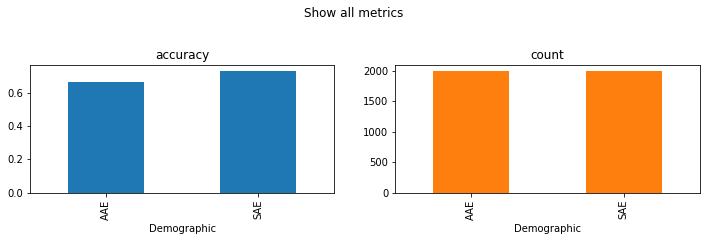

In [89]:
metrics = {'accuracy': accuracy_score, 'count': count}

metric_frame = MetricFrame(metrics=metrics,
                           y_true=dev_y,
                           y_pred=labels_predict,
                           sensitive_features=dev_data['Demographic'])
metric_frame.by_group.plot.bar(
    subplots=True,
    layout=[3, 2],
    legend=False,
    figsize=[12, 8],
    title="Show all metrics",
)